# Problem Stement:
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

## STEPS INVOLVED IN PCA

- Standardize the data.
- Find out covariance of transposed data.
- Calculate eigen value and eigen vector(also called as pca components).
- Select the highest eigen value.
- Calculate PC1 by performing matrix calculation of scaled data and eigen vector of highest eigen value.
- Calculate the explained variance ratio.

In [4]:
#Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import a dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\PCA\wine.csv')
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

# EDA

In [6]:
#shape of dataset:
df.shape

(178, 14)

In [8]:
#Desciptive statestics
df.describe().T

count        mean         std     min       25%      50%  \
Type             178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%      max  
Type               3.0000     3.00  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00

In [9]:
#check for duplicated
df.duplicated().sum()

0

In [10]:
#check for null value
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
#check for a data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
#plot a pairplot for whole dataset
sns.pairplot(df)

- Just looking at paitplot we can't identify or guess with number of clusters

<AxesSubplot:xlabel='Type', ylabel='count'>

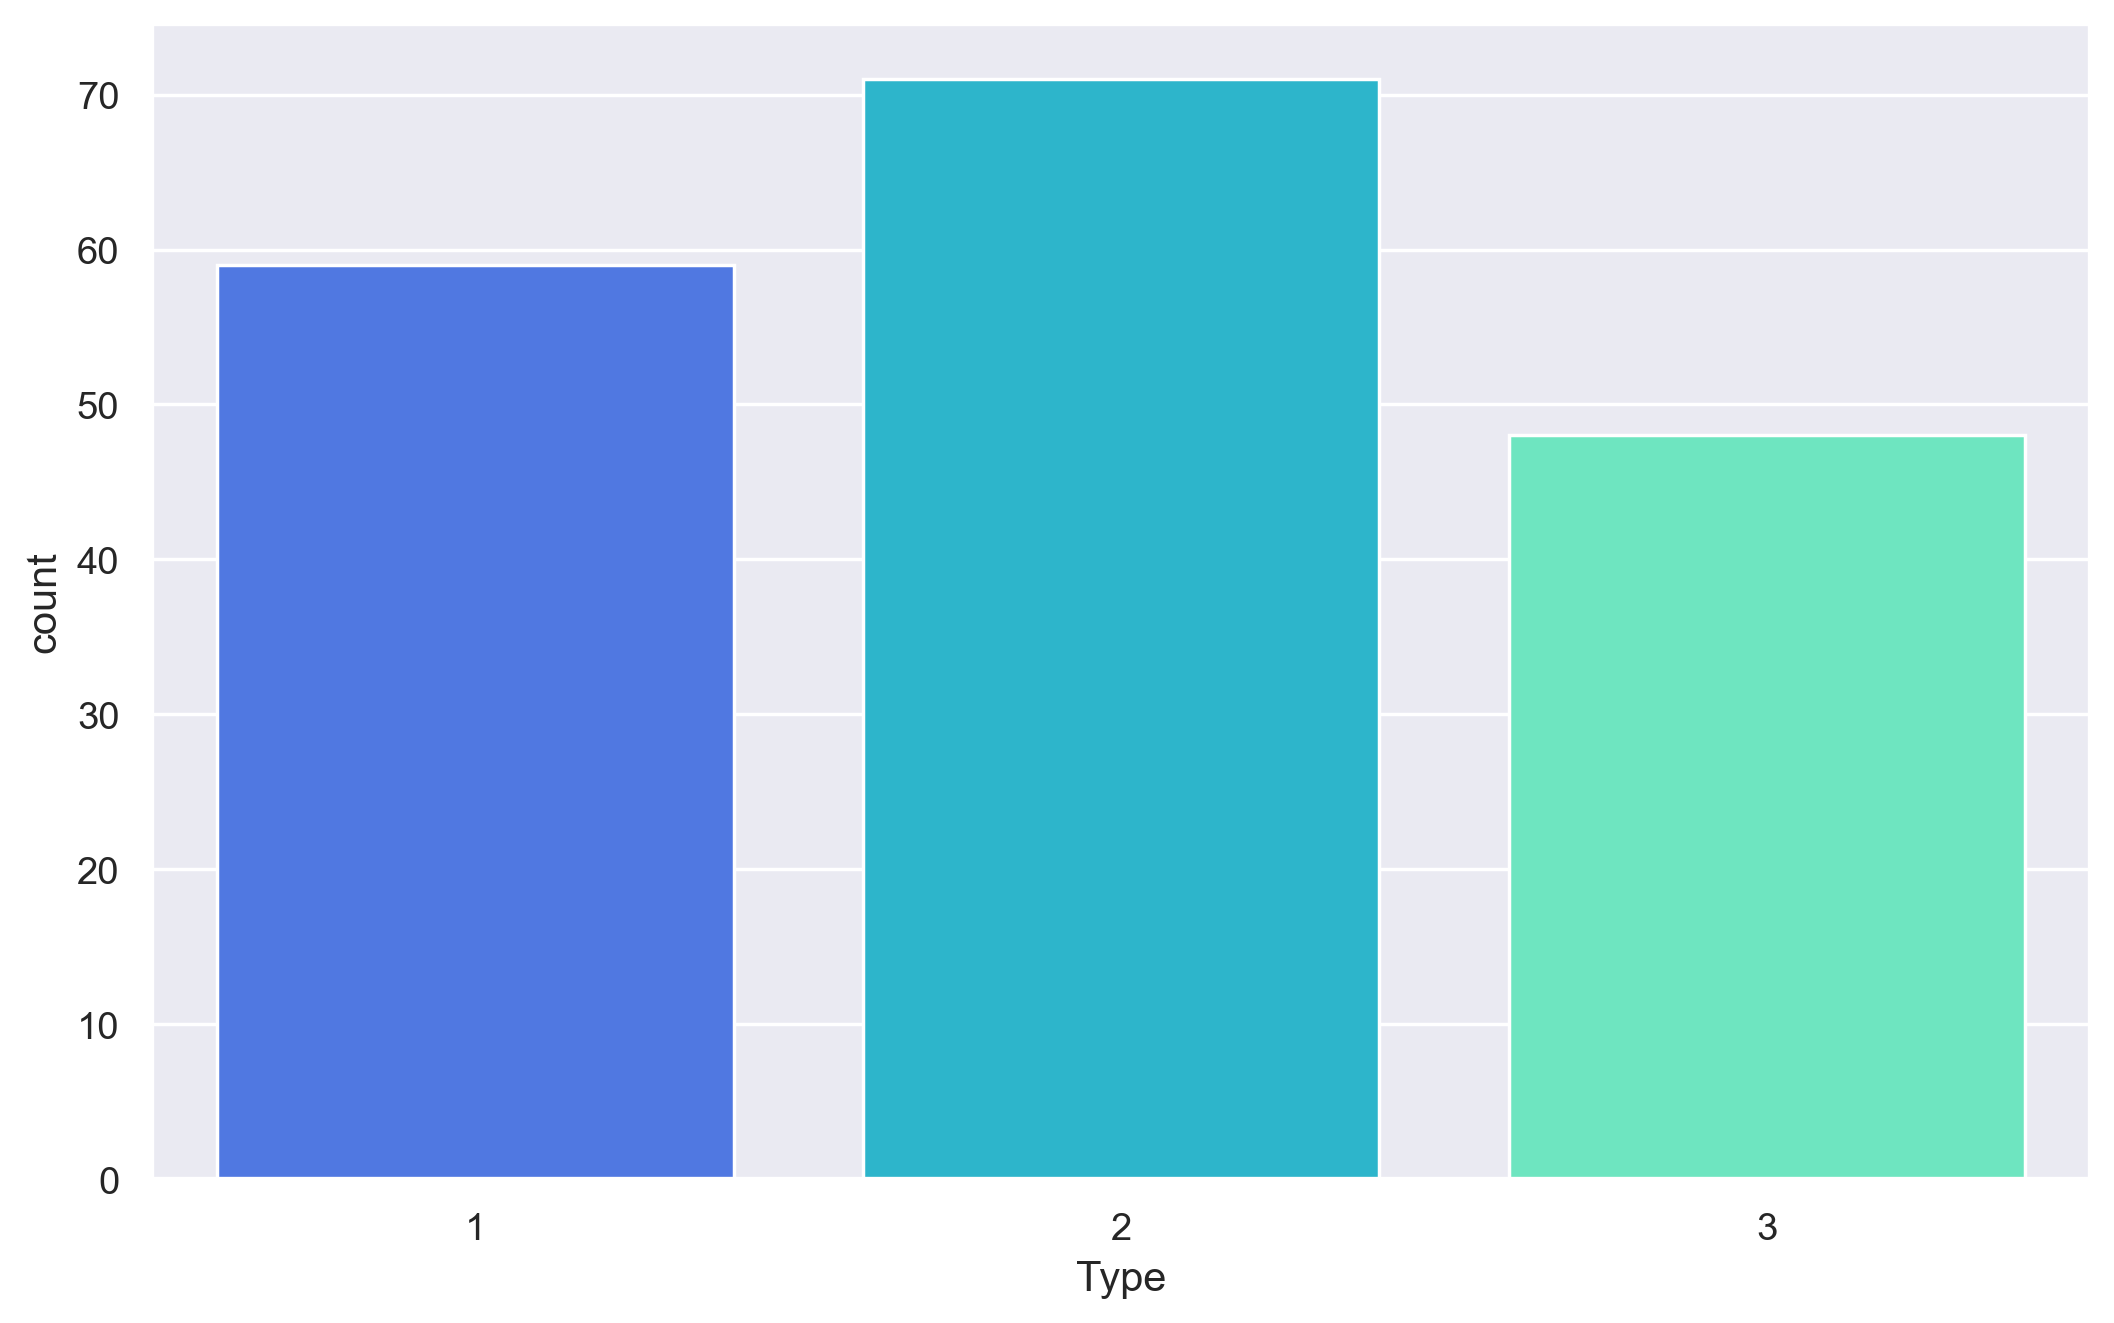

In [13]:
#plot a countplot for target column(type) to see the number of categories
sns.countplot(x=df['Type'], data=df)

- as per above countplot there are the three catagories, that means 3 clusters.

# PCA  (Principle component analysis)

####  Standardize the data.

In [17]:
#Craete a dataset by excluding target column
x=df.drop('Type', axis=1)
x

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [19]:
#Standardization:
sc=StandardScaler()
x=sc.fit_transform(x)

x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
#Craete a model with default value
pca=PCA()
pcs=pca.fit_transform(x)                     ##pcs=Principle components numbers are 13 as number of columns
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [22]:
#Find out how much variance is calculated  by each principle component
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [23]:
#calculate total variance by adding one by one princple component:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

-About 8 principle components gives the 93% data.

Text(0.5, 1.0, 'Scree Plot')

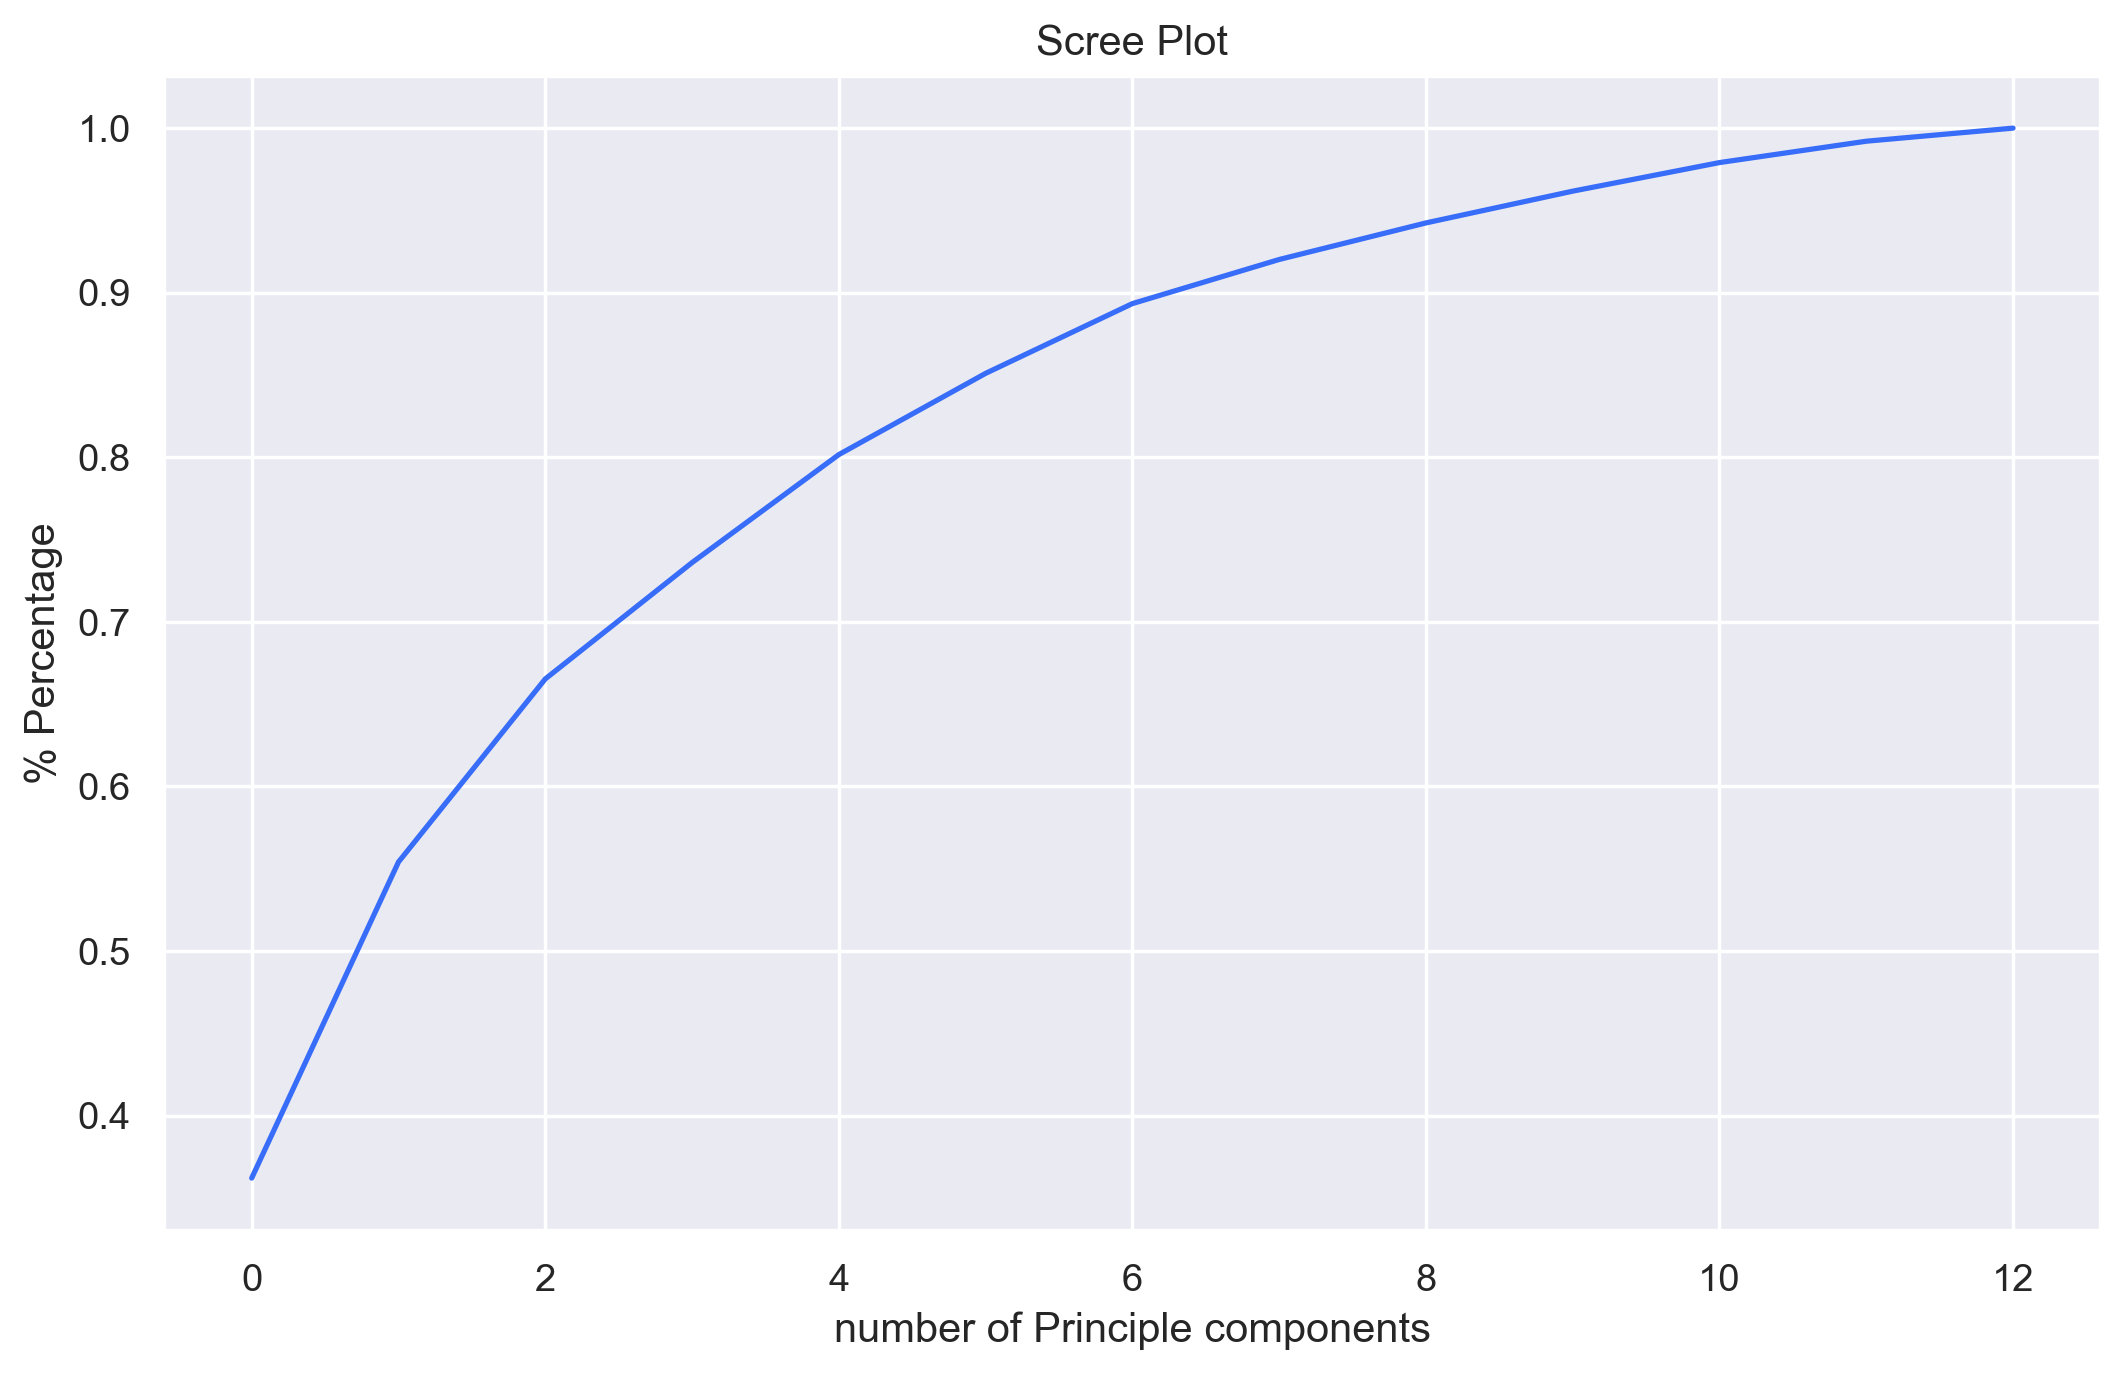

In [26]:
#plot a scree plot to see the component wise persentage of data 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('% Percentage')
plt.xlabel('number of Principle components')
plt.title('Scree Plot')

In [27]:
pca = PCA(n_components=8)
pcs = pca.fit_transform(x)
X = pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
X

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

          PC8  
0    0.065139  
1    1.024416  
2   -0.344216  
3    0.643593  
4    0.416700  
..        ...  
173 -0.146097  
174 -0.552427  
175  0.047024  
176  0.390829  
177 -0.292914  

[178 rows x 8 columns]

# t-SNE

# What is t-SNE?
 t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

In [28]:
!pip install bioinfokit

     -------------------------------------- 87.0/87.0 kB 273.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58669 sha256=a24a0611b3a7cde1b7af7a2b88e2cc30db7a1d9f12406dd28ebb34c8edd919b5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c9\ab\ed\8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=3303

In [31]:
#import liabray
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [32]:
#Create a model with three principle component as it doesnot accept more than tree component.
tsne=TSNE(n_components=2)
ts=tsne.fit_transform(x)
ts

array([[ -8.680122  ,  -9.465963  ],
       [ -5.7416563 ,  -6.1930017 ],
       [-10.057353  ,  -6.0962114 ],
       [-10.745373  ,  -8.991215  ],
       [-11.087908  ,  -2.7052765 ],
       [-11.002266  ,  -8.062064  ],
       [ -7.937615  ,  -6.330387  ],
       [-10.150886  ,  -4.1354475 ],
       [ -7.242406  ,  -7.020127  ],
       [ -8.073894  ,  -7.632313  ],
       [-10.958988  ,  -7.110627  ],
       [ -7.0677404 ,  -5.761041  ],
       [ -8.1179    ,  -5.8245573 ],
       [-10.14633   ,  -1.2210449 ],
       [-11.991416  ,  -8.611515  ],
       [-10.612927  ,  -4.8576994 ],
       [-11.458899  ,  -5.232794  ],
       [-11.375966  ,  -4.9135466 ],
       [-11.755094  ,  -7.753701  ],
       [ -8.162044  ,  -2.32226   ],
       [ -8.354288  ,  -9.360942  ],
       [ -6.8571324 ,  -2.4246914 ],
       [ -7.672827  ,  -5.277853  ],
       [ -7.38121   ,  -3.9507818 ],
       [ -7.6881323 ,  -3.7737424 ],
       [-11.721441  ,  -2.3147619 ],
       [ -8.764955  ,  -4.864212  ],
 

In [37]:
cluster.tsneplot(ts)

- from above cluster plot as per TSNE plot we get the three clusters.
- Cross veryfy by hierarchical clustering and KMeans Clustering

# 1. Hierarchical Clustering

In [41]:
#As per problem statement create a datset with three principle components
x1=X.iloc[:,:3]
x1

PC1       PC2       PC3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]

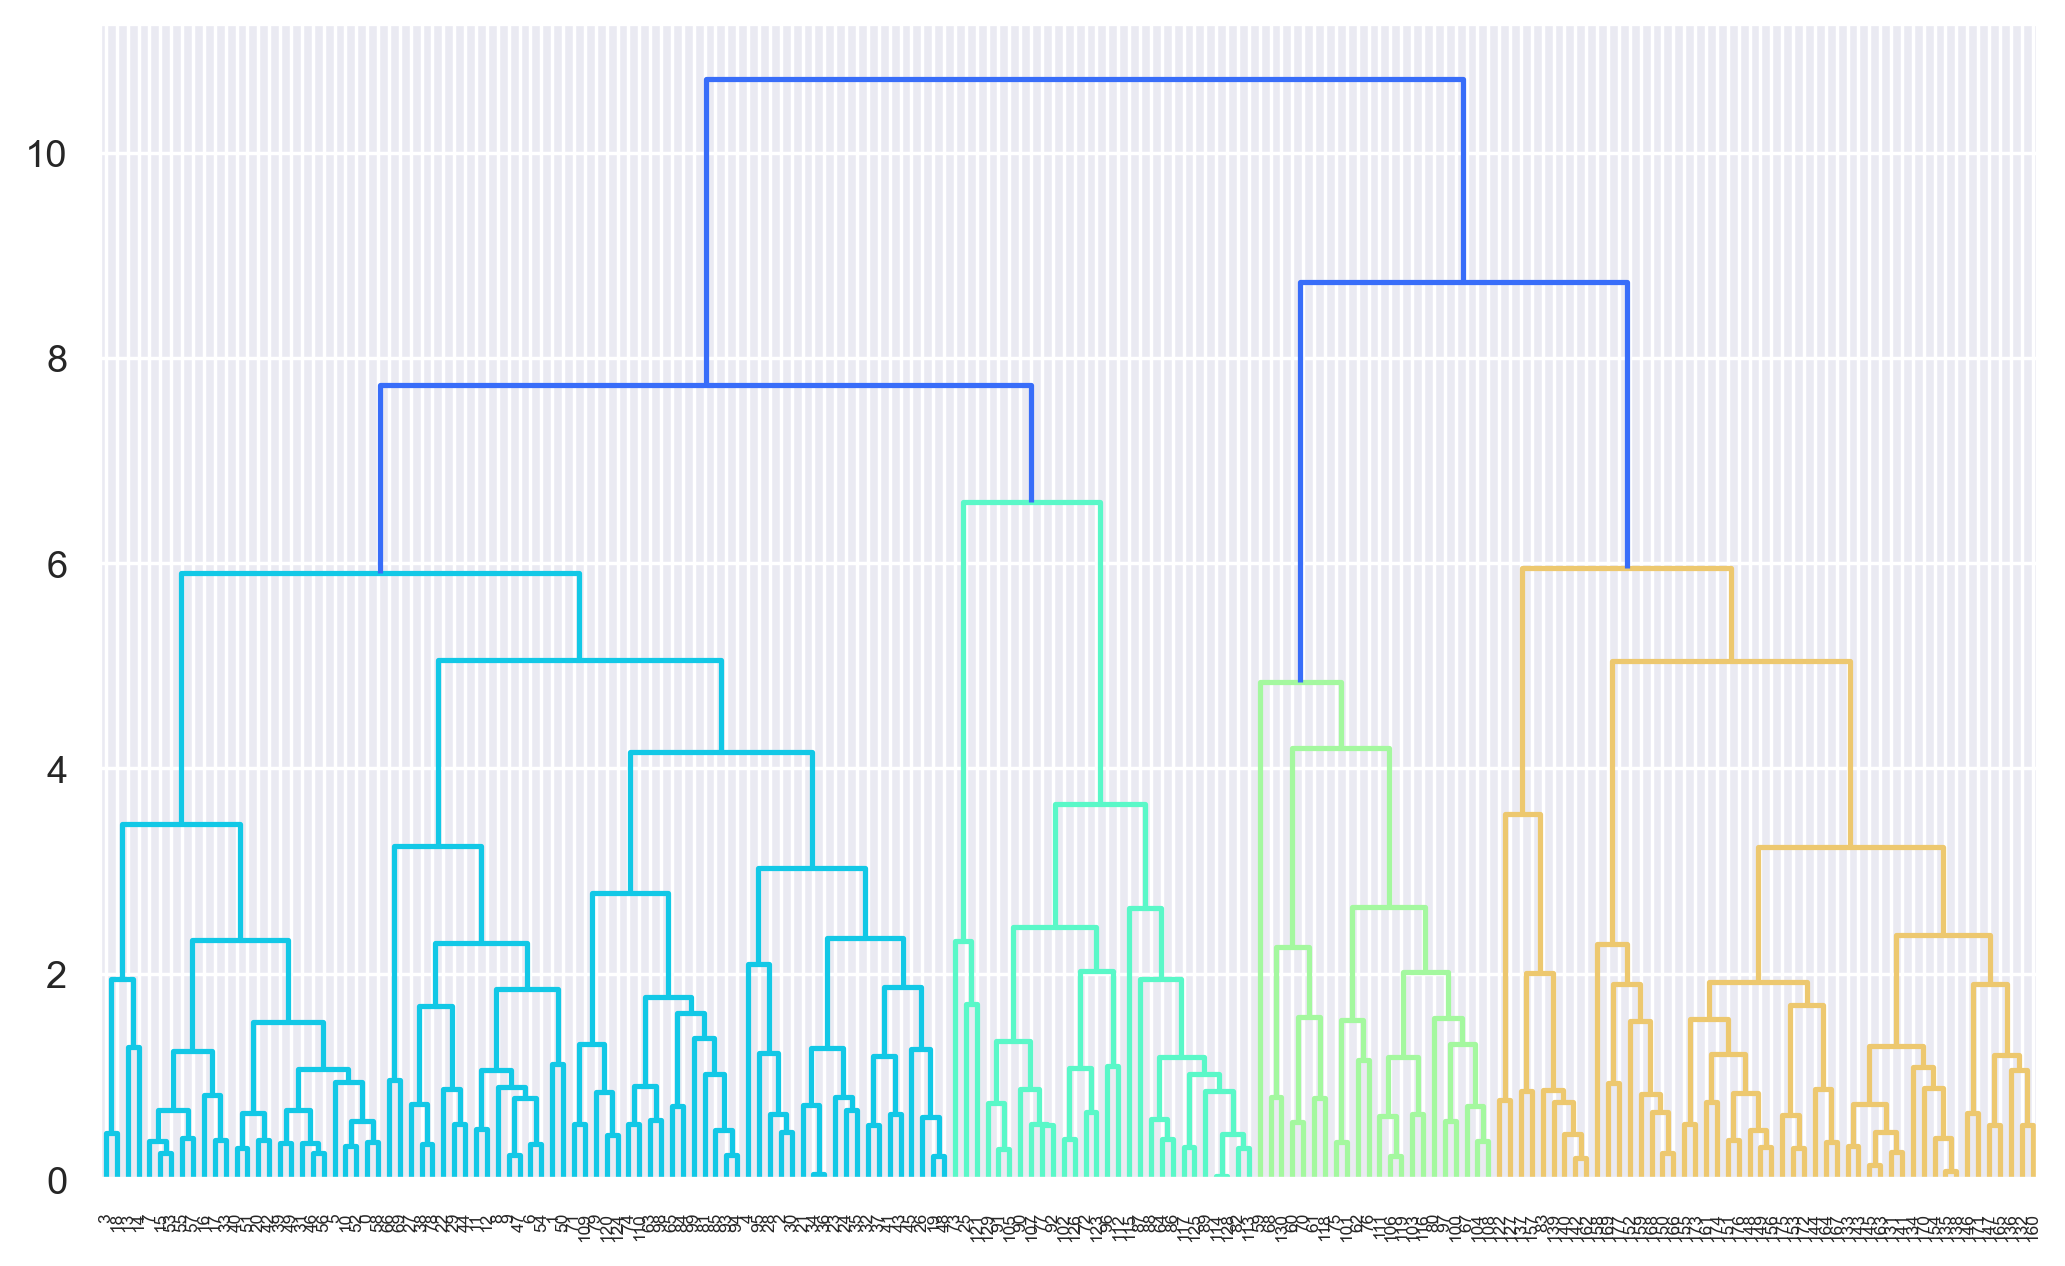

In [47]:
#Craete a model for hierarchical clustering
lk=hierarchy.linkage(x1,method='complete')
dendrogram=hierarchy.dendrogram(lk)

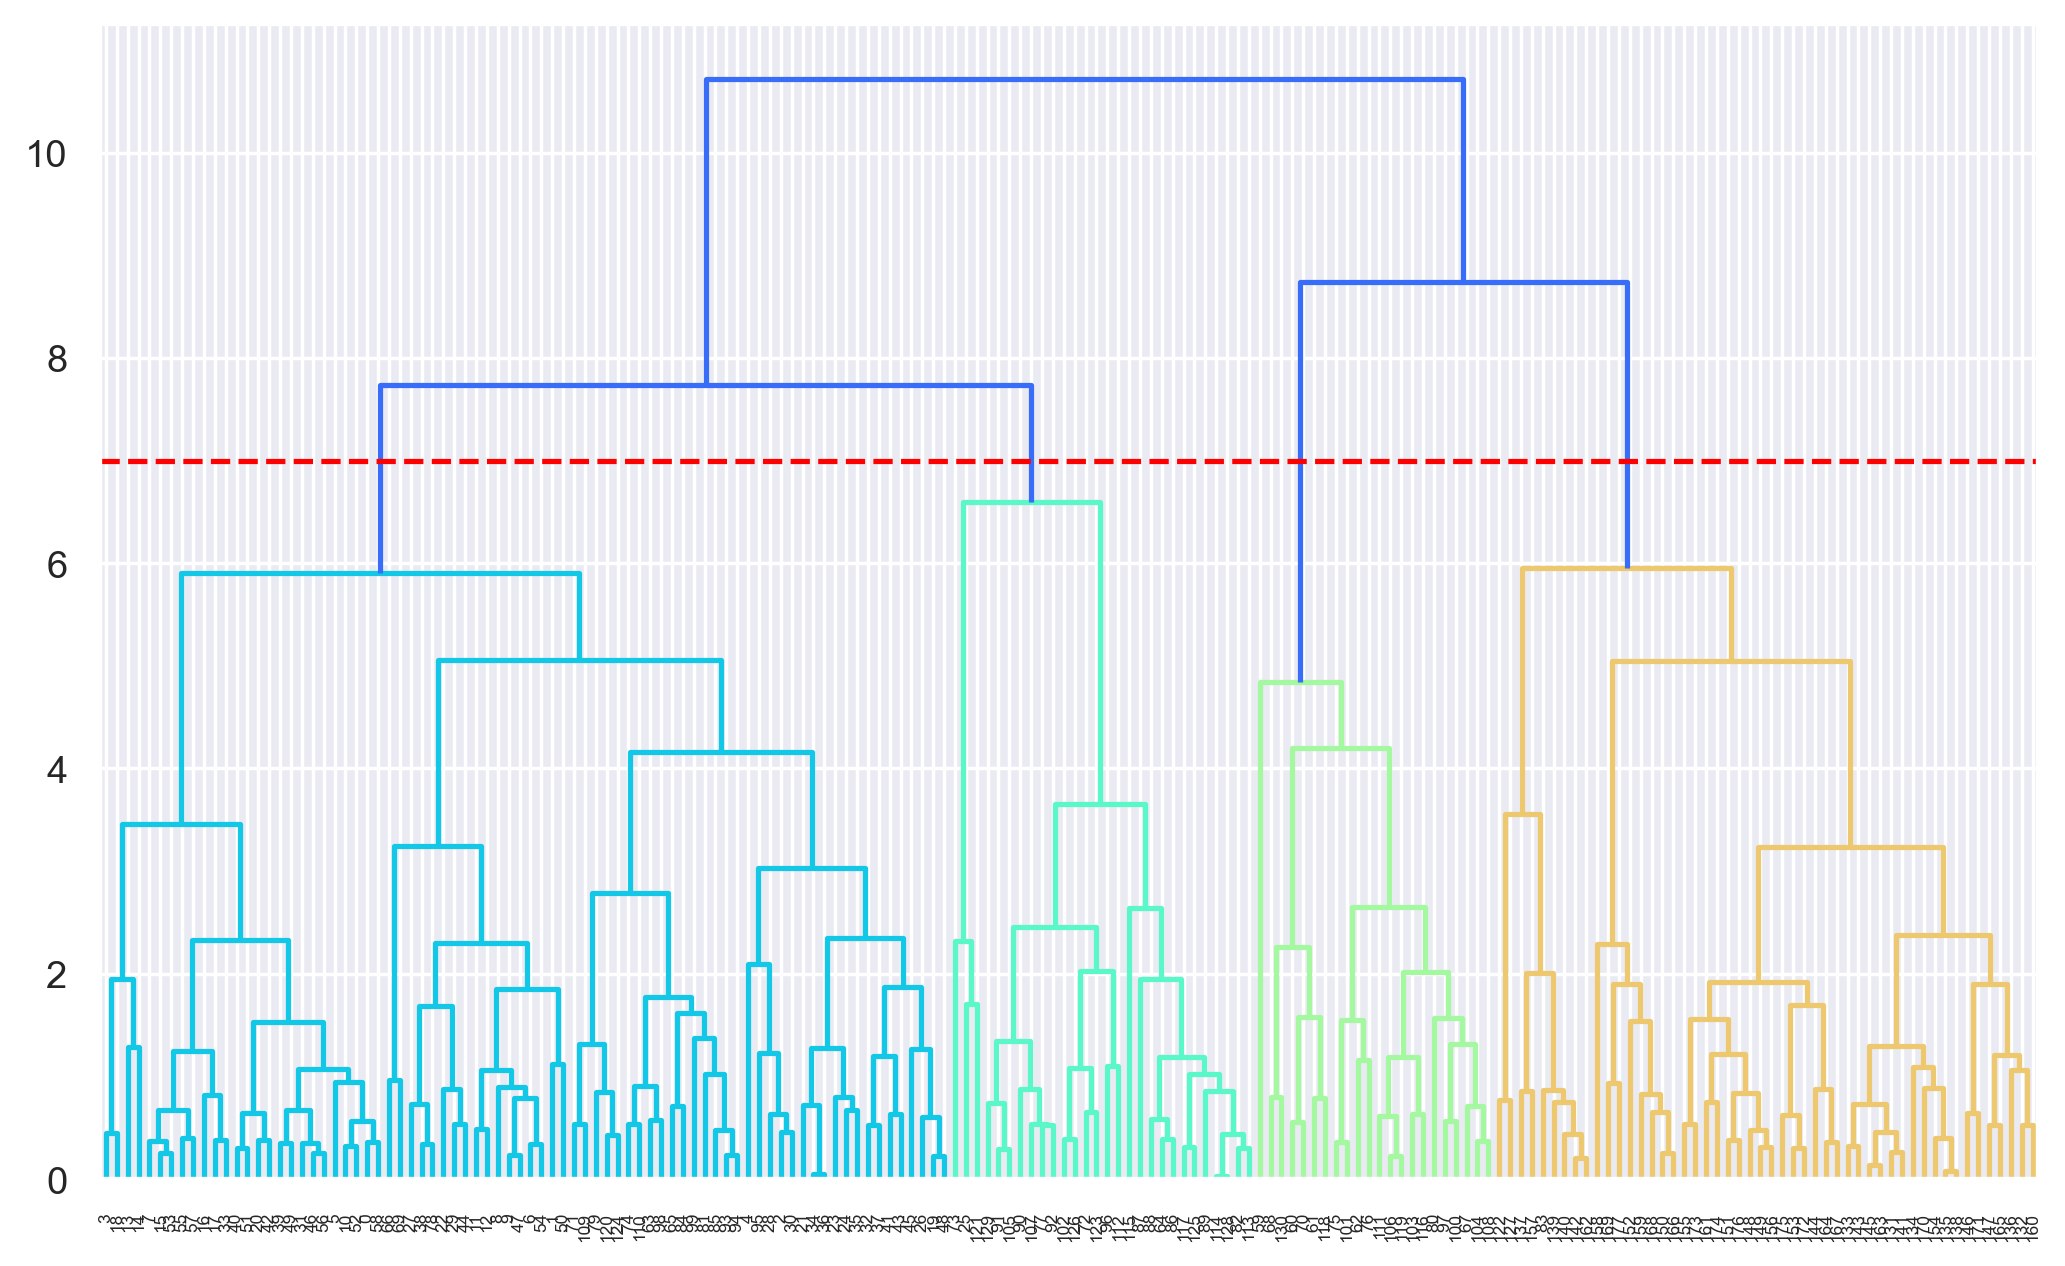

In [48]:
lk=hierarchy.linkage(x1,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=7,c='red', linestyle='--')

In [49]:
#Craete the model of Hierarchical clustering with four clusters.
hc=AgglomerativeClustering(n_clusters=4)
y=hc.fit_predict(x1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 0, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [50]:
silhouette_score(x1,y)

0.38195690348144407

- lets try for three number of cluster and ckec a silhoutte score for the same

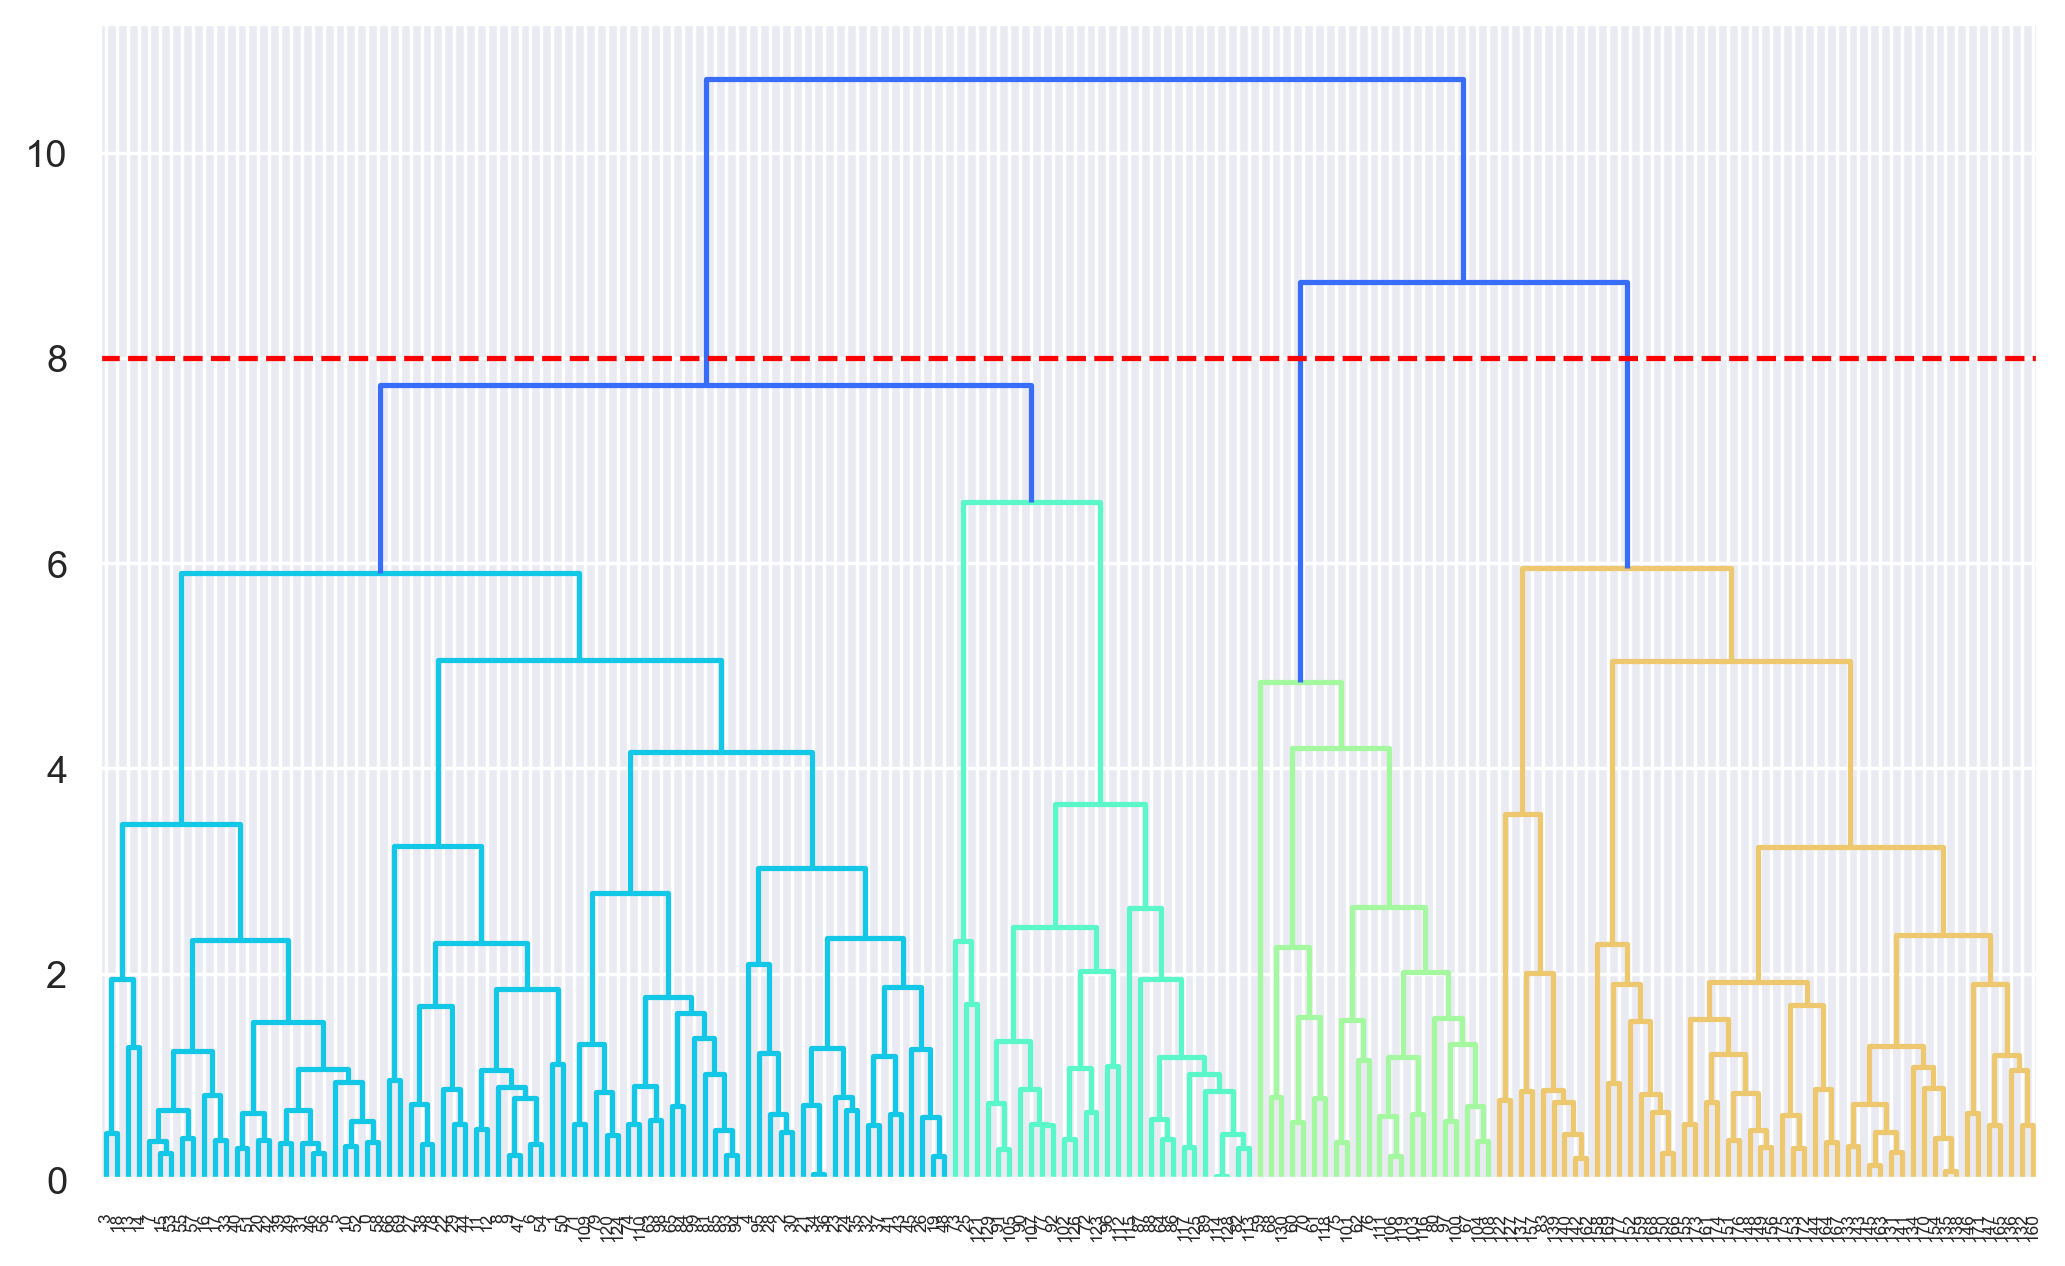

In [51]:
lk=hierarchy.linkage(x1,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=8,c='red', linestyle='--')

In [52]:
#Craete the model of Hierarchical clustering with three clusters.
hc=AgglomerativeClustering(n_clusters=3)
y1=hc.fit_predict(x1)
y1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [53]:
silhouette_score(x1,y1)

0.44594921980629704

- As the silhoutte score in higher for a three cluster, so will consider second model is a final model.

# KMeans Clustering

#### Find a optimum number of cluster:

In [56]:
#Find variance within the clusters:

wcss= []

for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [57]:
wcss

[1539.5034801883062,
 886.1611364823499,
 513.0564645910767,
 429.62808190874733,
 370.7144783350984,
 325.1955636191499,
 286.8977093401052,
 260.7880954606313,
 242.224495436521]

Text(0.5, 1.0, 'Elbow plot')

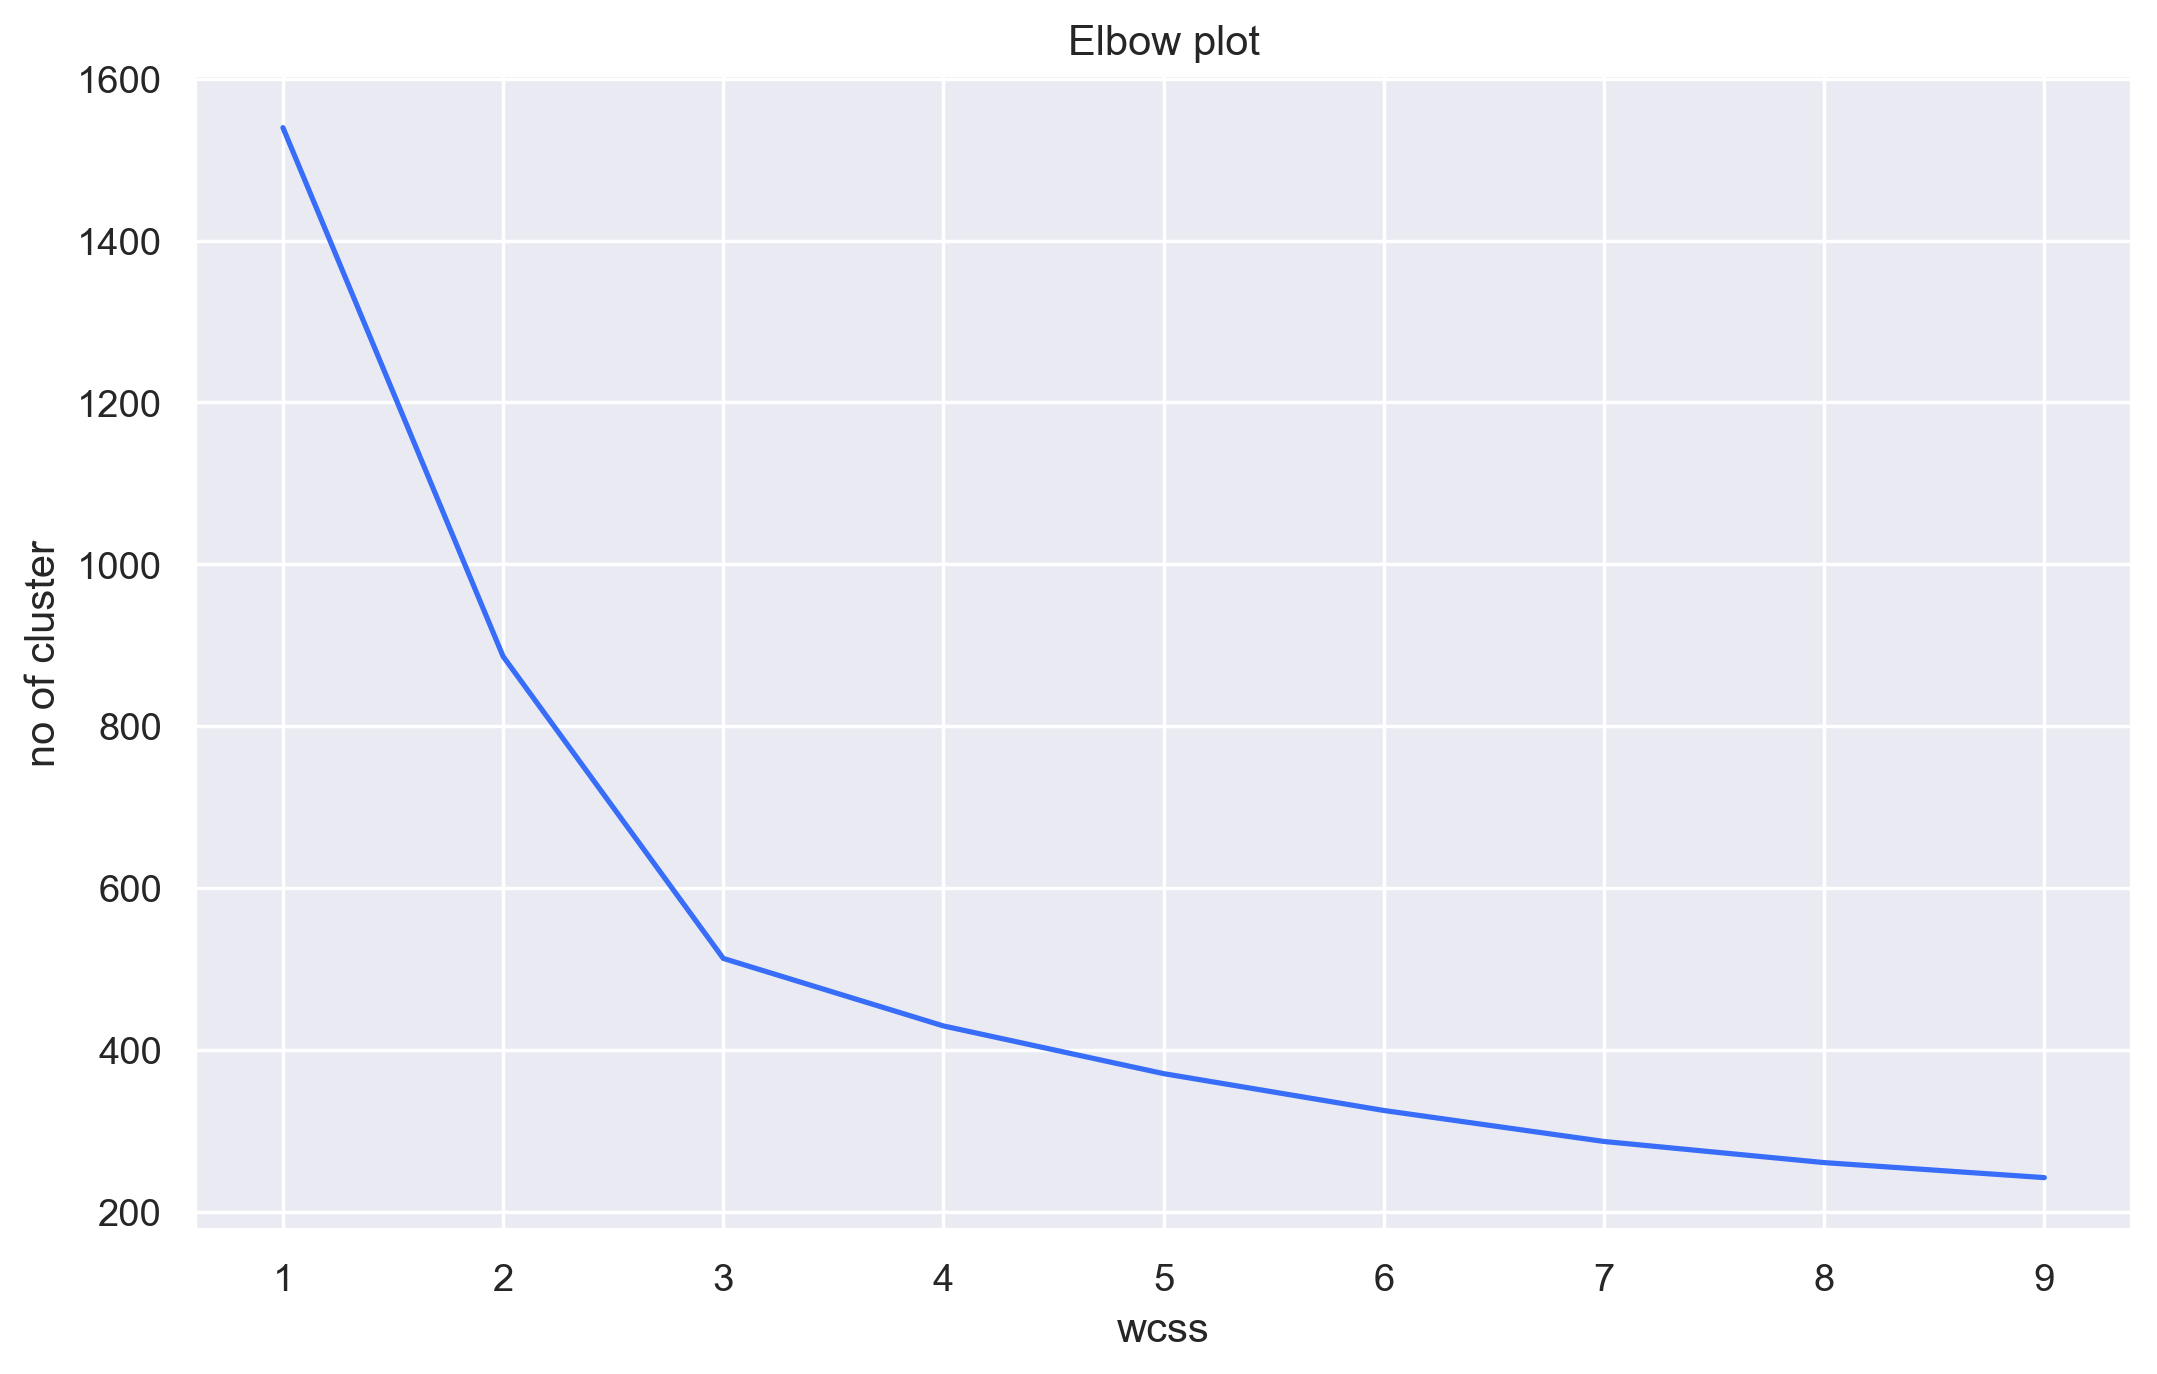

In [60]:
#plot a line plot wcss vs number of clusters:
plt.plot(range(1,10), wcss)
plt.xlabel('wcss')
plt.ylabel('no of cluster')
plt.title('Elbow plot')

- From above plot we can see that at at 3rd cluster, wcss value ia drastically desceases. so we will build the model with 3 clusters.

In [62]:
model=KMeans(n_clusters=3)
y2=model.fit_predict(x1)
y2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [63]:
silhouette_score(x1,y2)

0.4537999848257617

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer

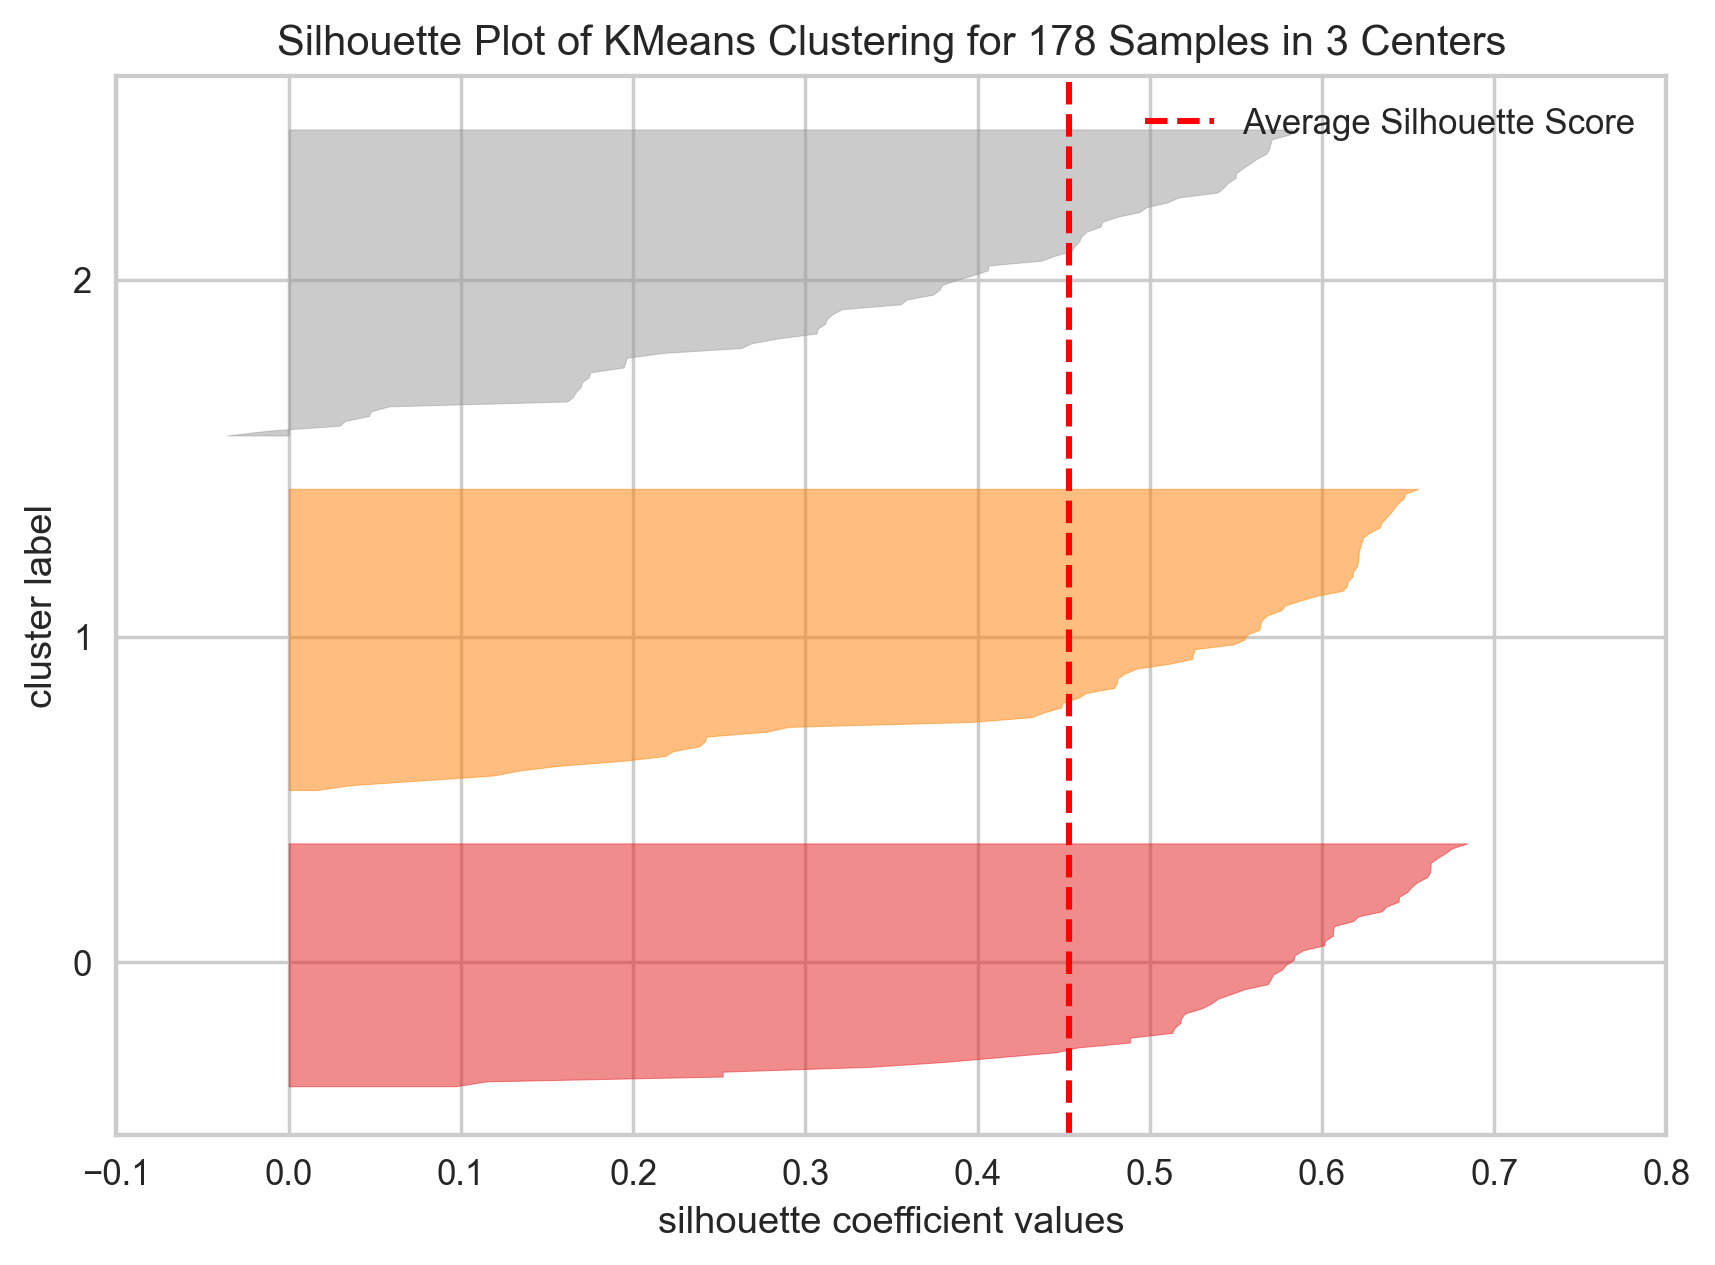

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
sv=SilhouetteVisualizer(KMeans(n_clusters=3))
vis=sv.fit(x1)
vis.show()

- Each and every cluster is crossed the red dotted line, but some data points second cluster are crossing zero towards the negative, that means they are the outliers.
- so we will find out the other best silhouette score for the optimum number of cluster

In [66]:
sil_score=[]

for i in range(2,20):
    km=KMeans(n_clusters=i)
    y3=km.fit_predict(x1)
    sil_score.append(silhouette_score(x1,y3))

In [67]:
sil_score

[0.38938813089003277,
 0.4532351215683952,
 0.41102968197688594,
 0.3586356996994221,
 0.3336871485808296,
 0.3082196928750393,
 0.29544076848966133,
 0.3022427996983142,
 0.30723688596219767,
 0.30102433204630186,
 0.30485630563350163,
 0.30378662260423817,
 0.29968260928873214,
 0.3076568945885415,
 0.29584764134095703,
 0.30510441048368564,
 0.3034865141506193,
 0.288683166351831]

- As per above silhoutte scoare, highest silhotte score is 0.4532, which we has been achived. so will stop here with clustering.
- Three clusters are best as per model also original data set has also three catagories.